In [2]:
#UNIT- 4 CLUSTERING
from sklearn.datasets import make_blobs
X,Y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5)
# total samples apne paas 150 hh, cluster ka standard deviation apan ne 0.5 lia hh,  jo apan samples create kr rhe vo 3 centers k aas paas scatter hoge tabhi center =3 liya hh jese 50 samples 1 center p another samples on another center. 


In [3]:
print(X,Y)

[[ 5.94285634  2.32638317]
 [ 8.56688063 -7.23990274]
 [ 7.16335729 -7.54347703]
 [ 5.90443234  2.46973905]
 [ 5.13848737  2.62403514]
 [ 7.60407937 -6.82533059]
 [-5.6260027  -5.83702923]
 [-4.90385079 -5.39040492]
 [ 5.06110876  1.67402247]
 [ 8.56074535 -7.57114781]
 [-4.56674327 -5.40178268]
 [ 4.94424417  2.73135512]
 [ 8.39352949 -7.3090773 ]
 [ 5.64767761  2.40898061]
 [ 4.78462185  2.14966262]
 [-4.75945405 -4.9029735 ]
 [ 7.43498934 -7.97931367]
 [-4.71543069 -5.99368371]
 [-5.24232221 -5.80408224]
 [ 8.37356841 -7.85912636]
 [ 8.11464785 -8.4757862 ]
 [ 8.07314693 -7.15516322]
 [ 5.0088187   2.36643402]
 [-4.45118881 -5.52110263]
 [-4.78293894 -5.25920873]
 [-5.83876865 -4.9726249 ]
 [-4.26416908 -5.57974614]
 [ 8.3030722  -7.09487848]
 [-4.55489179 -4.72799005]
 [ 8.12227922 -8.01360358]
 [ 8.67430711 -5.97972839]
 [ 7.8902229  -7.05776971]
 [ 5.31453301  2.40709952]
 [-4.95621796 -4.30174254]
 [-4.49660562 -5.87686472]
 [ 5.31608646  2.20169122]
 [ 8.86476819 -7.97425651]
 

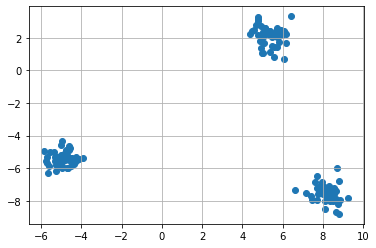

In [10]:
#apan ab scatter points ko plot krenge apan ko training data plot krte hh i.e X so apan ne scatter function m phele sari X values with 1st feature that is why we have written 0   with X values for feature 2 i.e 1
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],marker='o')
plt.grid()
plt.show()

In [12]:
#ab apan KNN algorithm lagaeyge
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,max_iter=100,tol=0.0001) #tolerance value is tol, centroid ki value agar 0.0001 ho jaeygi toh aage iterate nhi krege i.e. we'll stop out algorithm 
y_km=km.fit_predict(X)
#apan ne n_cluster 2 liye tabhi apan k paas fir utne hi bar hme cluster or X k features ko map krna padega
#jese ab apan 2 bar krege kyuki 2 cluster bnege predict ki hui values se or 2 hi apne features hh datatset k .

#Y_km i.e predict k values bhi 2 cluster m hh  toh apan fir plot krege X & y_km k 1st features or cluster  ko i.e. 0 aur Y_km k 1st cluster i.e. 0 and X k 2nd features i.e. 1
#fir same apan y_km k 2nd cluster k sath X k features plot krege


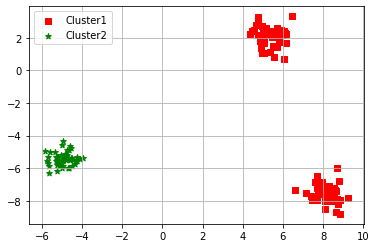

In [21]:
# fir apan ne dono ko sath plot kiya 
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='red',marker='s',label='Cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='green',marker='*',label='Cluster2')
plt.legend()
plt.grid()
plt.show()

In [26]:
print("DISTORTION: ",km.inertia_)

DISTORTION:  27.64411857733258


### ELBOW METHOD FOR FINDING OPTIMAL VALUE FOR K



7443.271369270893
2607.9173885079877
71.71219427427499
60.69718618605484
50.973651819161844
42.521665008652576
35.180739249119775
30.98726225652065
27.64411857733258


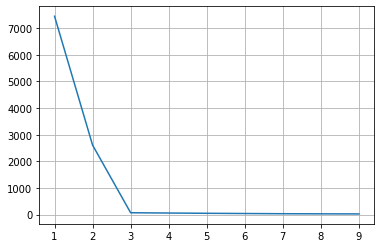

In [25]:
#ELBOW METHOD FOR FINDING OPTIMAL VALUE OF K
from sklearn.cluster import KMeans
import numpy as np

distortion=[]

for i in range(1,10,1):
    km=KMeans(n_clusters=i)
    y_km=km.fit_predict(X)
    distortion.append(km.inertia_)
    print(km.inertia_)

a=np.arange(1,10,1)
plt.plot(a,distortion)
plt.grid()
plt.show()




#### K ki optimal value 3 hogi as 3 k baad sab linear hi hh i.e. sab aas paas hi hh values 


In [34]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X,y_km))

0.37314140829624637


In [45]:
#NOW WE'LL DO THE SAME WITH IRIS DATASET
from sklearn.datasets import load_iris
import pandas as pd
df=load_iris()
data=df["data"]
target=df["target"]




In [1]:
import pandas as pd
import numpy as np
variables=['X','Y','Z']
labels=['ID1','ID2','ID3','ID4','ID5']
X=np.random.random([5,3])*10
df=pd.DataFrame(X,columns=variables,index=labels)
print(df)


            X         Y         Z
ID1  4.616582  0.826062  7.437484
ID2  4.240679  4.591898  5.785141
ID3  6.901985  4.013192  3.735927
ID4  7.772278  3.142866  7.484972
ID5  8.024606  1.049667  0.417955


In [3]:
from scipy.spatial.distance import pdist,squareform

In [4]:
row_dist=pd.DataFrame(pdist(df,metric='euclidean'))
columns=labels
print(row_dist)

          0
0  4.129535
1  5.392809
2  3.915131
3  7.806306
4  3.408332
5  4.178673
6  7.461380
7  3.945912
8  4.588212
9  7.374814


In [5]:
from scipy.cluster.hierarchy import linkage


In [6]:
row_clusters=linkage(df.values,method='complete',metric='euclidean')
df1=pd.DataFrame(row_clusters,columns=['row label 1','row label 2','distance','no of items in cluster'])
#, index=['cluster %d %'])
print(df1)

   row label 1  row label 2  distance  no of items in cluster
0          1.0          2.0  3.408332                     2.0
1          0.0          3.0  3.915131                     2.0
2          5.0          6.0  5.392809                     4.0
3          4.0          7.0  7.806306                     5.0
